In [1]:
from experiments.Scheduling.eval import Config, EmuWorld, EmuCloud, EmuDevice
from experiments.Scheduling.visualize import visualize
import matplotlib.pyplot as plt

In [2]:
config = Config()
config.max_draft_tokens = 10
config.max_new_tokens = 99
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
print(world.entities[0].target_tokens)
print(world.entities[1].target_tokens)
print(world.wall_time)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294]
28.02800000001127


In [15]:
config = Config()
config.method = "synchronized"
config.max_draft_tokens = 10
config.max_new_tokens = 99
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
print(world.entities[0].target_tokens)
print(world.entities[1].target_tokens)
# visualize(config, world)
print(world.wall_time)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207]
100.00000000011343


Node[1]: Aggregator initialized at 0 s


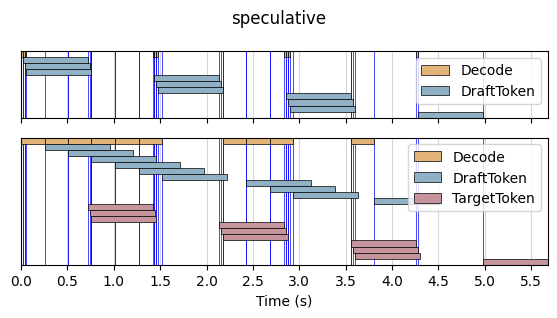

In [4]:
config = Config()
config.max_draft_tokens = 3
config.max_new_tokens = 10
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
figure = visualize(config, world)
# plt.close()

Node[1]: Aggregator initialized at 0 s


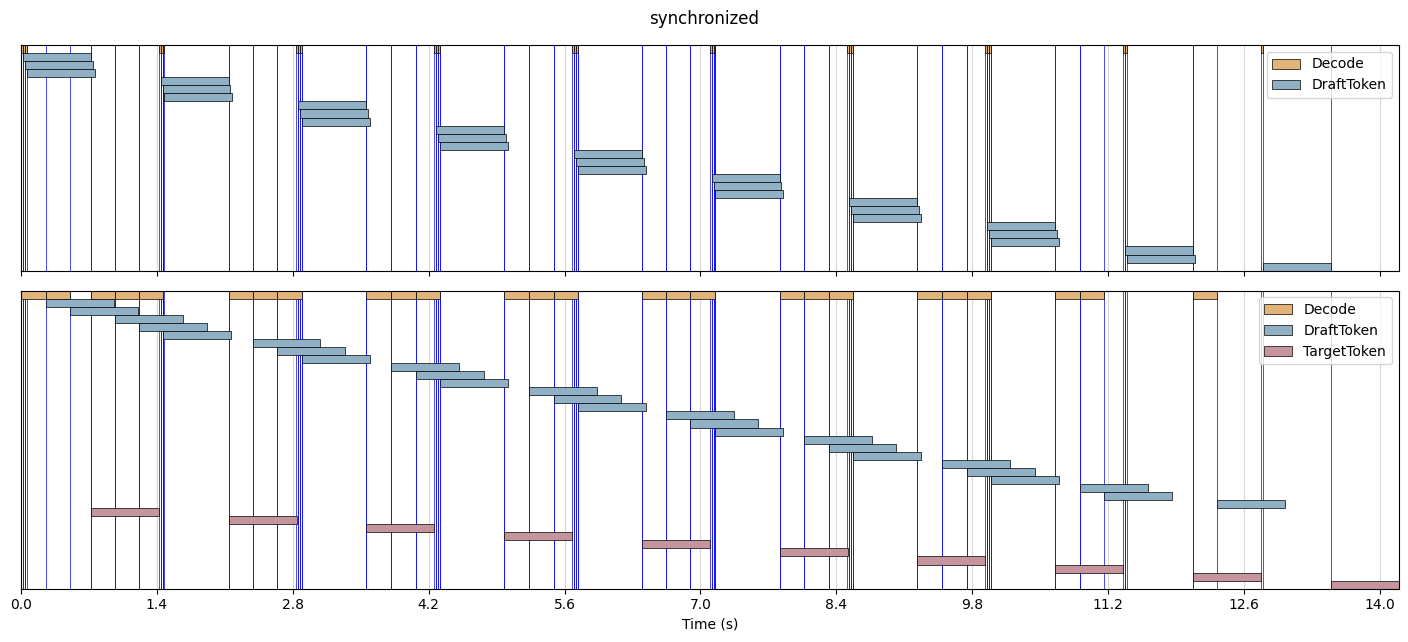

In [5]:
config = Config()
config.method = "synchronized"
config.max_draft_tokens = 3
config.max_new_tokens = 10
world = EmuWorld(precision=1e-3)
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(120)
figure = visualize(config, world)
# plt.close()

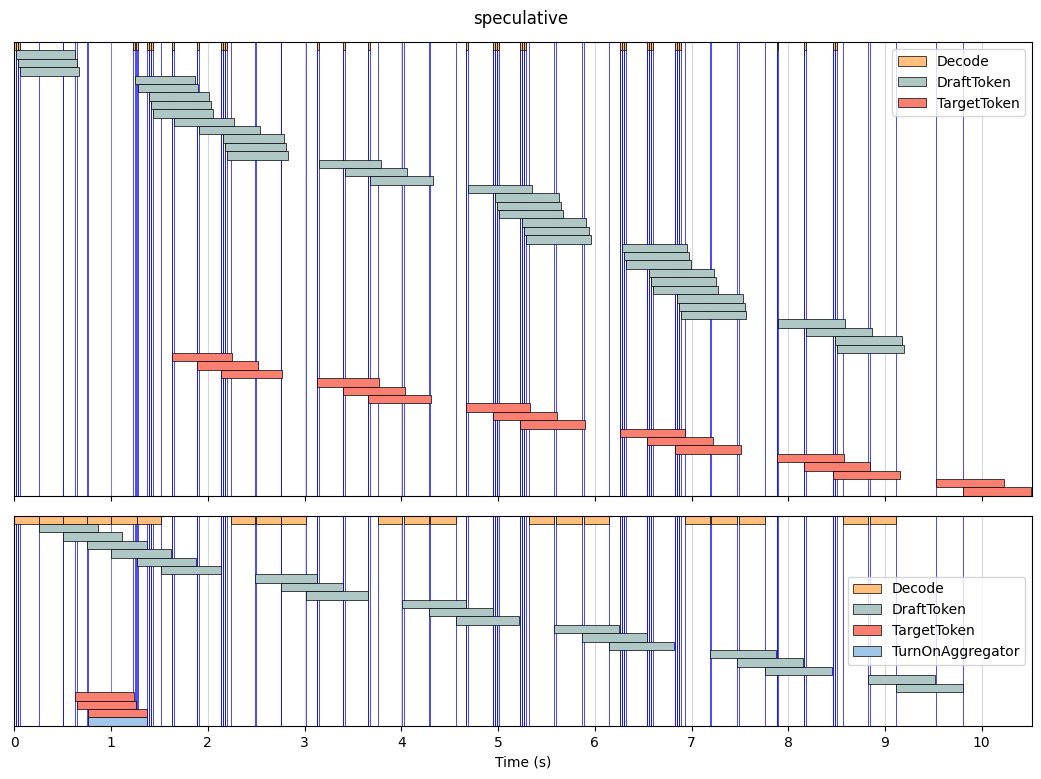

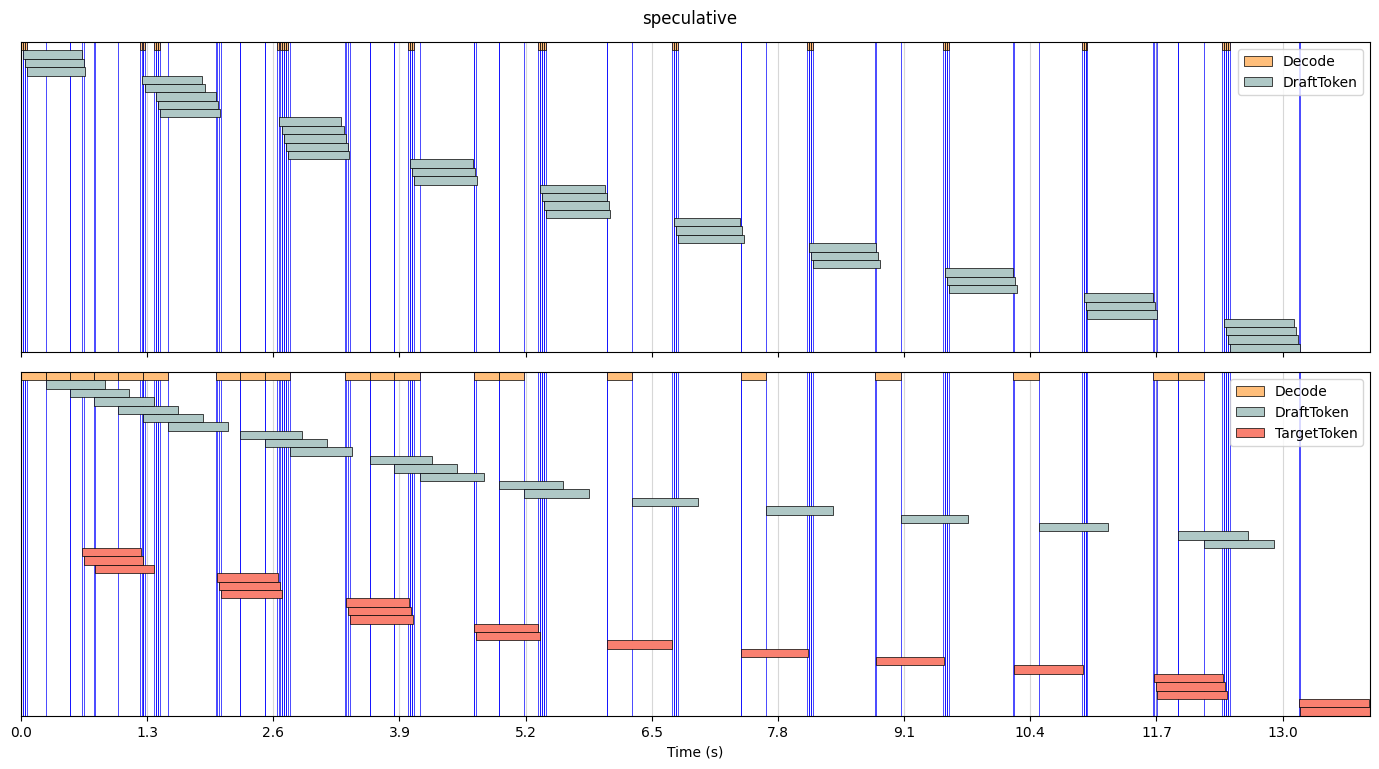

In [6]:
from experiments.Scheduling.eval import Config, EmuWorld, EmuCloud, EmuDevice
from experiments.Scheduling.visualize import visualize
import matplotlib.pyplot as plt
from functools import partial
import numpy as np

def latency_trace(t, latency, jitter):
    np.random.seed(int(t * 100))
    return 0.002 + np.random.uniform(0, 0.006) + latency + np.sin(t / 10) * jitter

latency = 0.6
config = Config()
config.precision = 0.01
config.method = "speculative"
config.scheduler.strategy = 'DRAGON'
config.max_draft_tokens = 3
config.max_new_tokens = 20
world = EmuWorld(config, partial(latency_trace, latency=latency, jitter=latency/5))
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
figure = visualize(config, world)
# figure.savefig('speculative_dragon.png', dpi=300)
figure.show()
# plt.close()

latency = 0.6
config = Config()
config.precision = 0.01
config.method = "speculative"
config.scheduler.strategy = 'never'
config.max_draft_tokens = 3
config.max_new_tokens = 20
world = EmuWorld(config, partial(latency_trace, latency=latency, jitter=latency/5))
world.add_entities([EmuCloud(world, config), EmuDevice(world, config)])
world.run_until(100)
figure = visualize(config, world)
# figure.savefig('speculative_never.png', dpi=300)
figure.show()
# plt.close()

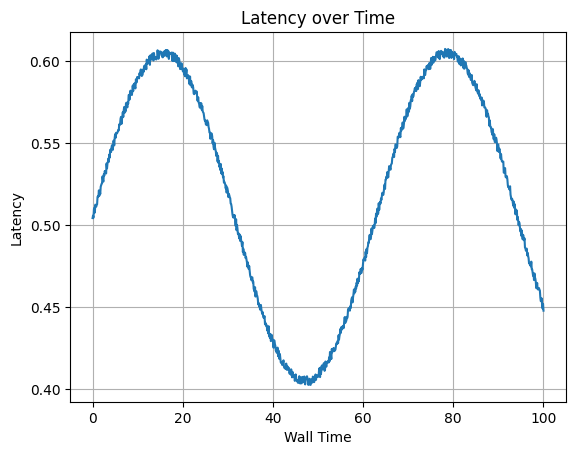

In [5]:
import random
import numpy as np

latency, jitter = 0.5, 0.1
wall_time = np.linspace(0, 100, 1000)
ground_latency = 0.002 + np.random.uniform(0, 0.006, 1000)
extra_latency_base = latency + np.sin(wall_time / 10) * jitter
result = ground_latency + extra_latency_base
plt.plot(wall_time, result)
plt.title("Latency over Time")
plt.xlabel("Wall Time")
plt.ylabel("Latency")
plt.grid()
plt.show()